In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('nobel.csv')

In [4]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France


In [6]:
display(len(df))

# Display the number of prizes won by male and female recipients.
display(df['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
df['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

In [7]:
df['usa_born_winner'] = df['birth_country'] == "United States of America"
df['decade'] = (np.floor(df['year'] / 10) * 10).astype('int')
usa_winners = df.groupby('decade', as_index=False)['usa_born_winner'].count()


In [8]:
usa_winners

,decade,usa_born_winner
0,1900,57
1,1910,40
2,1920,54
3,1930,56
4,1940,43
5,1950,72
6,1960,79
7,1970,104
8,1980,97
9,1990,104


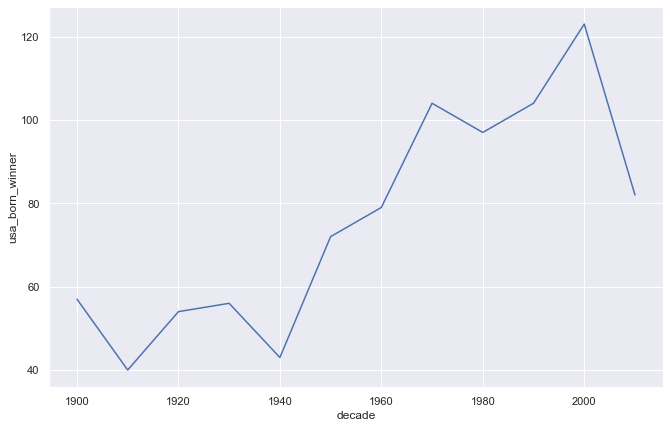

In [14]:
# Setting the plotting theme
sns.set()

# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

ax = sns.lineplot(x='decade', y='usa_born_winner', markers=True, dashes=False, data=usa_winners)

In [16]:
# Calculating the proportion of female laureates per decade
df['female_winner'] = df['sex'] == "Female"
female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].count()
female_winners

,decade,category,female_winner
0,1900,Chemistry,9
1,1900,Literature,10
2,1900,Medicine,11
3,1900,Peace,14
4,1900,Physics,13
...,...,...,...
61,2010,Economics,14
62,2010,Literature,7
63,2010,Medicine,16
64,2010,Peace,10


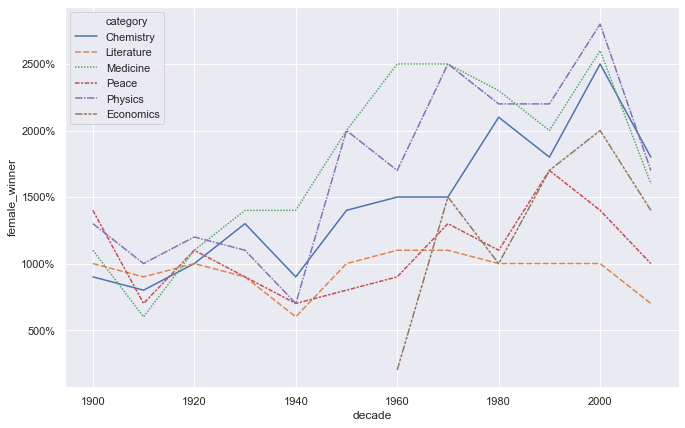

In [18]:
# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='category', style="category", data=female_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [19]:
# Picking out the first woman to win a Nobel Prize
df[df['sex'] == 'Female'].nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",4-Jan,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,7/4/1934,Sallanches,France,False,1900,True


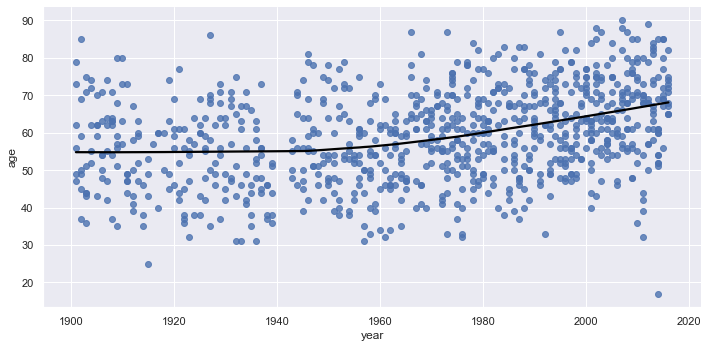

In [22]:
# Converting birth_date from String to datetime
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Calculating the age of Nobel Prize winners
df['age'] = df['year'] - df['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=df, lowess=True, aspect=2, line_kws={'color': 'black'})

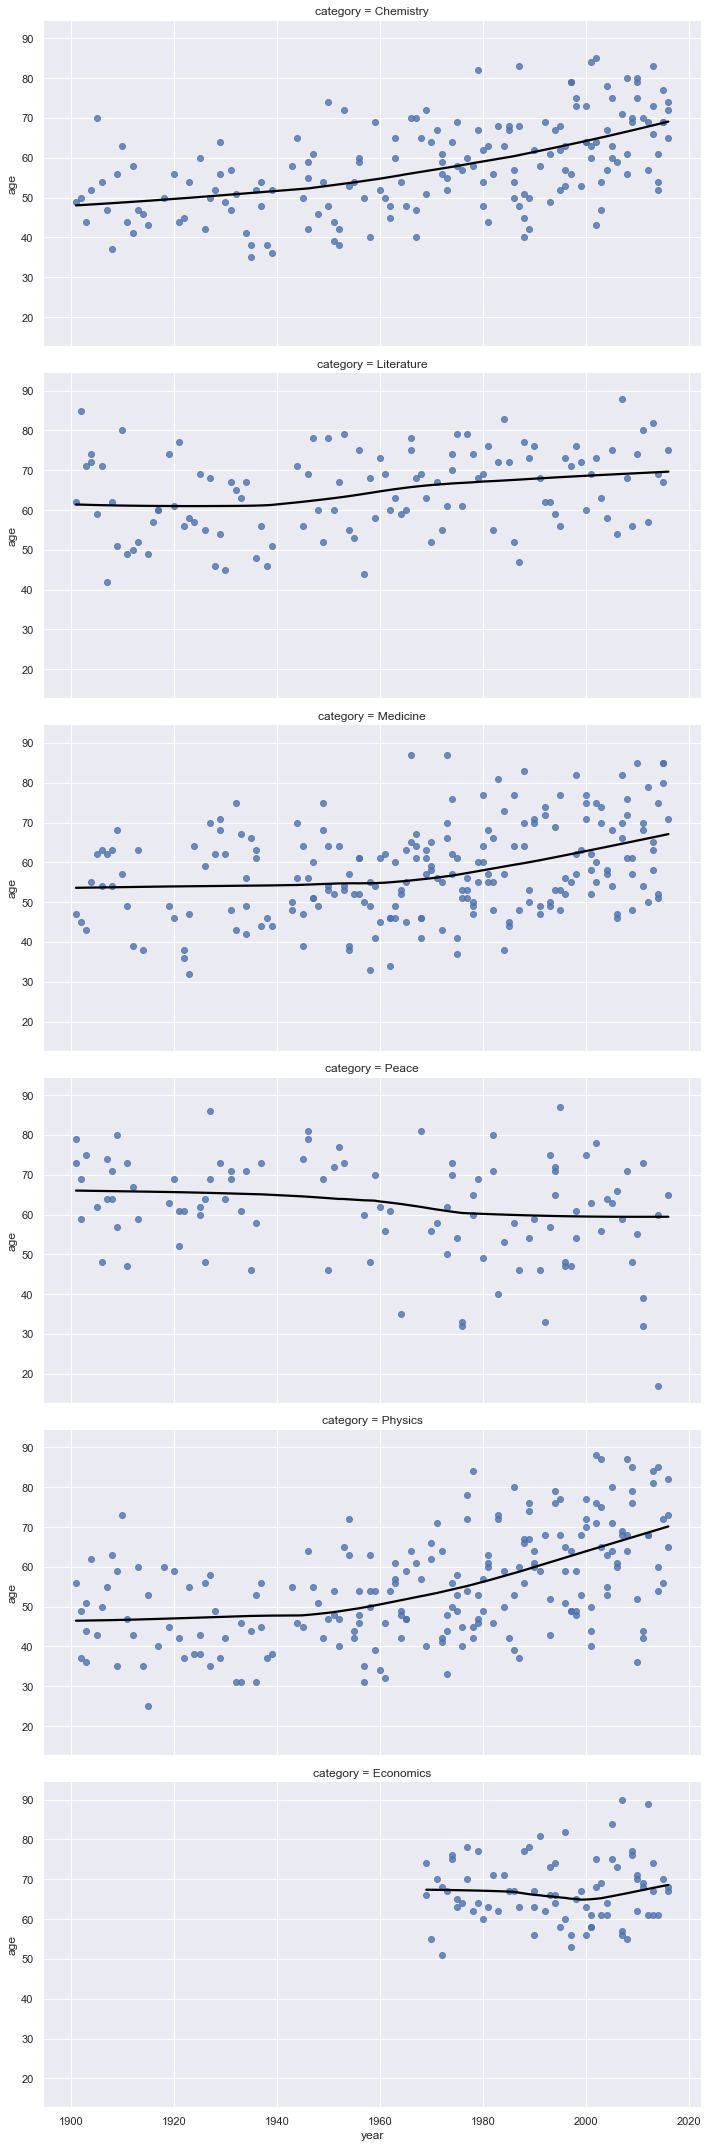

In [23]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', row='category', data=df, lowess=True, aspect=2, line_kws={'color': 'black'});

In [24]:
# The oldest winner of a Nobel Prize as of 2016
display(df.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
display(df.nsmallest(1, 'age'))


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",3-Jan,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,6/24/2008,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",2-Jan,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
